In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 24 21:27:54 2016

@author: Gabriela Sandoval & Héctor Camarillo
"""

import numpy as np
import scipy as sp
import scipy.stats as ss
import pylab as py
import math
from numpy import random
from scipy.optimize import minimize, show_options
from scipy.stats import expon

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io


from sklearn.mixture import GMM
import matplotlib.mlab as mlab

Here we read the database containing the crying samples used for this example. Each samples has 10 columns, and 2,000 rows. Each row is a different sample, and each column an attribute

In [2]:
normal = scipy.io.loadmat('C:\Users\k43e-msr1-red-r\OneDrive\Documentos\Primavera_2016\Soft_Computing\Llantos\LlantoNormLyap.mat', squeeze_me = True, struct_as_record=False)
sordo = scipy.io.loadmat('C:\Users\k43e-msr1-red-r\OneDrive\Documentos\Primavera_2016\Soft_Computing\Llantos\LlantoSordoLyap.mat', squeeze_me = True, struct_as_record=False)
asfixia = scipy.io.loadmat('C:\Users\k43e-msr1-red-r\OneDrive\Documentos\Primavera_2016\Soft_Computing\Llantos\LlantoAsfixN.mat', squeeze_me = True, struct_as_record=False)

The databases are read as dictionary type, and we are interested in the array type in that dictionary. Hence we extract the array as follows

In [3]:
aNormal=normal['MtxNormLyap']
aSordo=sordo['MtxSordoLyap']
aAsfixia=asfixia['PCMtxAsfix']

Then, we want to classify the fist 10 rows of each array, so we concatenate those rows as follows:

In [4]:
aNormal10=np.concatenate((aNormal[:,0],aNormal[:,1],aNormal[:,2],aNormal[:,3],aNormal[:,4],aNormal[:,5],aNormal[:,6],aNormal[:,7],aNormal[:,8],aNormal[:,9]))
aSordo10=np.concatenate((aSordo[:,0],aSordo[:,1],aSordo[:,2],aSordo[:,3],aSordo[:,4],aSordo[:,5],aSordo[:,6],aSordo[:,7],aSordo[:,8],aSordo[:,9]))
aAsfixia10=np.concatenate((aAsfixia[:,0],aAsfixia[:,1],aAsfixia[:,2],aAsfixia[:,3],aAsfixia[:,4],aAsfixia[:,5],aAsfixia[:,6],aAsfixia[:,7],aAsfixia[:,8],aAsfixia[:,9]))

Now we plot the histogram for each data type. We start by plotting the data from the cries of babys that are normal. Everytime we are using the normal samples, we'll use the color green

<Container object of 100 artists>

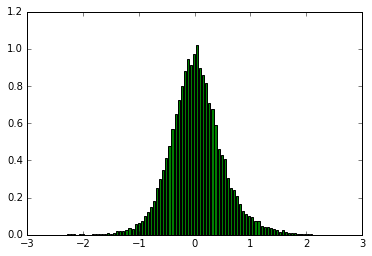

In [5]:
hist, bins = np.histogram(aNormal10,normed='true',bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='g')

Now we focus on the cries that are from babies that are deaf. We´ll use the yellow color

<Container object of 100 artists>

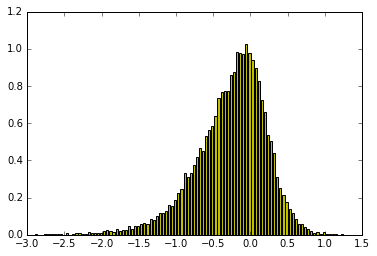

In [6]:
hist, bins = np.histogram(aSordo10,normed='true',bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='y')

Last but not least, babies that are suffering from asphixya. Since this is very serious, we´ll use the red color

<Container object of 100 artists>

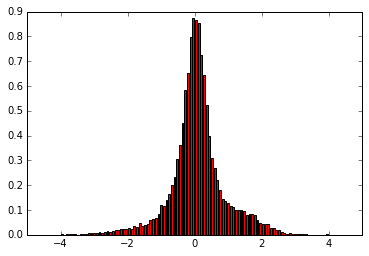

In [7]:
hist, bins = np.histogram(aAsfixia10,normed='true',bins=100,range=(-4,4))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
py.xlim(-5,5)
plt.bar(center, hist, align='center', width=width,color='red')


Now we merge the three classes into one single array, called llantosTodos, and we plot the histogram

<Container object of 100 artists>

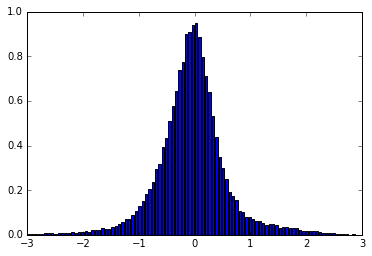

In [8]:
llantosTodos = np.concatenate([aNormal10,aSordo10,aAsfixia10])
hist, bins = np.histogram(llantosTodos,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
#py.xlim(-5,5)
plt.bar(center, hist, align='center', width=width,color='b')


Now let´s plot all of the histograms into one graph with their respective color, to get an idea of how the Gaussians must look

<Container object of 100 artists>

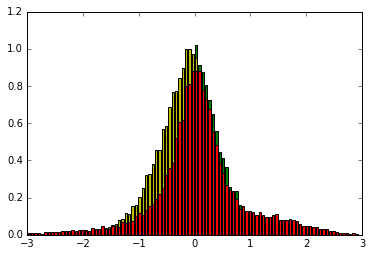

In [9]:
hist, bins = np.histogram(aNormal10,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='g')

hist, bins = np.histogram(aSordo10,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='y')

hist, bins = np.histogram(aAsfixia10,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
py.xlim(-3,3)
plt.bar(center, hist, align='center', width=width,color='r')

We can observe that separating the three classes is no easy task, but let´s try it with python's method

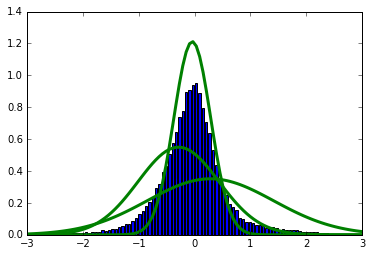

In [10]:
n=3

model = GMM(n)
ss = np.array([llantosTodos])
model.fit(ss.T)

miu=np.zeros(n)
cov=np.zeros(n)
miu=model.means_
cov=model.covars_ 

hist, bins = np.histogram(llantosTodos,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='b')

for ngm in range(len(miu)):
    mean = miu[ngm]
    variance = cov[ngm]
    sigma = np.sqrt(variance)
    x = np.linspace(-3, 3,100)
    plt.plot(x,mlab.normpdf(x,mean,sigma),c='g', linewidth=3)
#y.xlim(-3,3)
plt.show()

Now let's compare to each class, let´s start with normal cries

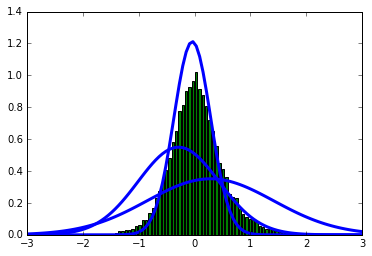

In [11]:
hist, bins = np.histogram(aNormal10,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='g')

for ngm in range(len(miu)):
    mean = miu[ngm]
    variance = cov[ngm]
    sigma = np.sqrt(variance)
    x = np.linspace(-3, 3,100)
    plt.plot(x,mlab.normpdf(x,mean,sigma),c='b', linewidth=3)
plt.show()

Now let´s continue with the deaf ones

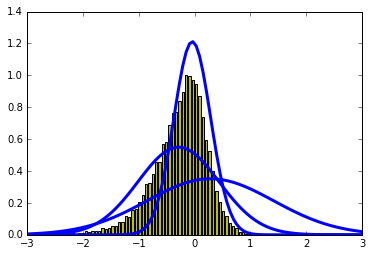

In [12]:
hist, bins = np.histogram(aSordo10,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='y')

for ngm in range(len(miu)):
    mean = miu[ngm]
    variance = cov[ngm]
    sigma = np.sqrt(variance)
    x = np.linspace(-3, 3,100)
    plt.plot(x,mlab.normpdf(x,mean,sigma),c='b', linewidth=3)
plt.show()

Finally the ones from Asphixia

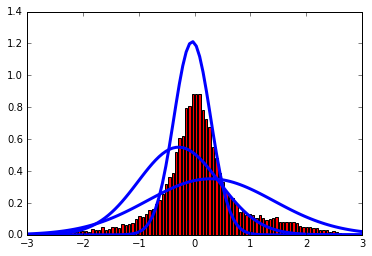

In [13]:
hist, bins = np.histogram(aAsfixia10,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='r')

for ngm in range(len(miu)):
    mean = miu[ngm]
    variance = cov[ngm]
    sigma = np.sqrt(variance)
    x = np.linspace(-3, 3,100)
    plt.plot(x,mlab.normpdf(x,mean,sigma),c='b', linewidth=3)   
plt.show()

Now we test the GMM with algorithm. We fist define the Probability Density Function

In [14]:
def pdf_model(x, mu, sig, p):
    pdf = 0
    for i in range(len(pi)):
        pdf = pdf + (p[i])*py.normpdf(x, mu[i], sig[i])
    return pdf

We initialize the mean values, the standard deviation, and the mixture parameter, and then we run the algorithm

In [37]:
mu=np.array([-0.2,0.2,0.7])
sig = np.array([0.2,0.2,0.2]) # estimated std dev
pi = np.array([0.2,0.5,0.3]) # mixture parameter
s=np.array(np.concatenate((aNormal10,aSordo10,aAsfixia[:,0],aAsfixia[:,1],aAsfixia[:,2],aAsfixia[:,3],aAsfixia[:,4],aAsfixia[:,5],aAsfixia[:,6],aAsfixia[:,9])))

gamma = np.zeros((3, s.size))
N_ = np.zeros(3)
mu_new=np.array(mu)
sig_new=np.array(sig)
p_new=np.array(pi)


delta = 0.0001
improvement = float('inf')
#improvement = 15
counter = 0

while (improvement > delta):
    # Compute the responsibility func. and new parameters
    for k in [0,1,2]:
        gamma[k,:] = pi[k]*py.normpdf(s, mu[k], sig[k])/pdf_model(s, mu_new,sig_new,p_new) # responsibility
        N_[k] = 1.*gamma[k].sum() # effective number of objects to k category
        mu[k] = sum(gamma[k]*s)/N_[k] # new sample mean of k category
        sig[k] = np.sqrt( sum(gamma[k]*(s-mu[k])**2)/N_[k] ) # new sample var of k category
        pi[k] = N_[k]/s.size # new mixture param of k category
    # updated parameters will be passed at next iter
    mu_old=np.array(mu_new)
    sig_old=np.array(sig_new)
    p_old = np.array(p_new)
    mu_new=np.array(mu)
    sig_new=np.array(sig)
    p_new=np.array(pi)
    # check convergence
    improvement = max(abs(mu_old[0] - mu_new[0]), abs(sig_old[0] - sig_new[0]) )
    #improvement = improvement-1
    print(improvement)
    counter += 1
    print "Means: %6.3f %6.3f %6.3f" % (mu_new[0], mu_new[1], mu_new[2])
    print "Std dev: %6.3f %6.3f %6.3f" % (sig_new[0], sig_new[1],sig[2])
    print "Mix (1): %6.3f %6.3f %6.3f " % (p_new[0],p_new[1],p_new[2])
    print "Total iterations %d" % counter
    print pi.sum(), N_.sum()   

0.306449916637
Means: -0.506  0.123  0.955
Std dev:  0.480  0.202  0.549
Mix (1):  0.473  0.385  0.141 
Total iterations 1
1.0 56400.0
0.0545774828384
Means: -0.458  0.100  0.926
Std dev:  0.535  0.220  0.632
Mix (1):  0.476  0.393  0.131 
Total iterations 2
1.0 56400.0
0.0373588520594
Means: -0.421  0.078  0.898
Std dev:  0.571  0.233  0.684
Mix (1):  0.477  0.397  0.125 
Total iterations 3
1.0 56400.0
0.0299006827641
Means: -0.391  0.058  0.874
Std dev:  0.597  0.244  0.727
Mix (1):  0.476  0.403  0.120 
Total iterations 4
1.0 56400.0
0.0245487864076
Means: -0.367  0.041  0.852
Std dev:  0.619  0.251  0.764
Mix (1):  0.473  0.411  0.116 
Total iterations 5
1.0 56400.0
0.0206126224742
Means: -0.346  0.026  0.831
Std dev:  0.638  0.258  0.796
Mix (1):  0.468  0.419  0.113 
Total iterations 6
1.0 56400.0
0.0176060875531
Means: -0.328  0.013  0.810
Std dev:  0.655  0.263  0.824
Mix (1):  0.462  0.428  0.109 
Total iterations 7
1.0 56400.0
0.0152712653404
Means: -0.313  0.003  0.790
Std d

Now we Plot the three Gaussians vs the whole samples

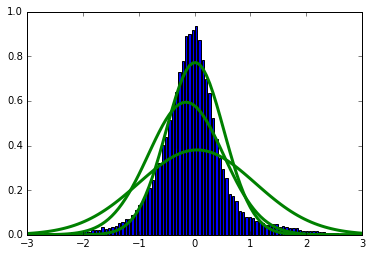

In [38]:
hist, bins = np.histogram(s,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='b')

for ngm in range(len(mu)):
    mean = mu[ngm]
    variance = sig[ngm]
    sigma = np.sqrt(variance)
    x = np.linspace(-3, 3,100)
    plt.plot(x,mlab.normpdf(x,mean,sigma),c='g', linewidth=3)
plt.show()

Finally we plot again, using different colors for each class

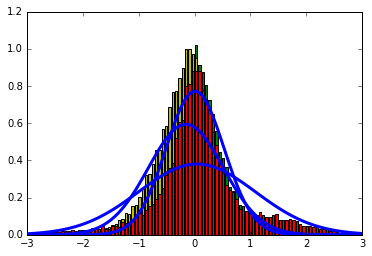

In [41]:
hist, bins = np.histogram(aNormal10,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='g')

hist, bins = np.histogram(aSordo10,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='y')

hist, bins = np.histogram(aAsfixia10,normed='true',bins=100,range=(-3,3))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width,color='r')

for ngm in range(len(mu)):
    mean = mu[ngm]
    variance = sig[ngm]
    sigma = np.sqrt(variance)
    x = np.linspace(-3, 3,100)
    plt.plot(x,mlab.normpdf(x,mean,sigma),c='b', linewidth=3) 
plt.show()